# Business Impact of discount

Here, we will test the impact of giving the churning clients 20% discount. 

<b>The main problem will be: 
1. if offering discount could be a good strategy.
2. who should be given discount.</b>

The metric to measure is overall revenue for next 12 months.

The first part will be basic framework, then there are other two scenarios coming along with the 20% discoutn strategy.

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
test_df = pd.read_csv('./out_of_sample_data_with_predictions.csv')
test_df.head()

,Unnamed: 0,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,months_modif_prod,months_renewal,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,churn,churn_probability
0,0,3.731347,4.157003,2.707570,2.888292,2.707570,0.0,1.286007,0.137153,0.000000,...,3,1,0,1,0,0,0,0,0,0.096
1,1,3.171726,4.888073,2.418301,2.349375,2.418301,0.0,1.288249,0.145711,0.000000,...,54,5,0,1,0,0,0,0,0,0.168
2,2,3.237795,0.000000,0.000000,2.417256,0.000000,0.0,0.123852,0.144039,0.000000,...,2,0,0,0,0,1,1,0,0,0.020
3,3,3.726075,0.000000,2.929930,2.902210,2.929930,0.0,1.299289,0.143227,0.000000,...,1,0,0,0,0,0,0,0,0,0.119
4,4,4.204690,0.000000,3.161967,3.010821,2.926857,0.0,2.118695,0.120372,0.103487,...,34,10,0,1,0,0,0,0,0,0.199


## A basic framework

The total revenue of giving discount will be compared with no discount.

### Baseline revenue estimate ( without discount )

Assumptions:
1. Calculate a baseline estimate of the electricity revenue for every customer for the next twelve months based on the forecast consumption and forecast price, meter rent and actual churn outcome. 
2. For customers who end up churning, we should reduce our forecast revenue calculation by 91.9% to account for the customers churn some time between January 2016 and the start of March 2016. (Not knowing when they churn, a reasonable assumption for the lost revenue is the average of 100%, corresponding to churn on 1 January 2016, and 83.9%, corresponding to churn at the end of February, or 59 days into a 365 day year). 

In [47]:
# reverse the log10-transformation from the data cleaning step
test_df['base_revenue']=(np.power(10,test_df['forecast_cons_12m'])+1)*test_df['forecast_price_energy_off_peak']+test_df['forecast_meter_rent_12m']
#churn is 0 or 1, if clients don't churn, then revenue is same as baseline, if they churn then the revenue will be 10% ish of the basiline revenue (lose 90%)
test_df['base_revenue_after_churn']=test_df['base_revenue']*(1- 0.919*test_df['churn'])

In [48]:
test_df.head()

,Unnamed: 0,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,churn,churn_probability,base_revenue,base_revenue_after_churn
0,0,3.731347,4.157003,2.707570,2.888292,2.707570,0.0,1.286007,0.137153,0.000000,...,0,1,0,0,0,0,0,0.096,107.469860,107.469860
1,1,3.171726,4.888073,2.418301,2.349375,2.418301,0.0,1.288249,0.145711,0.000000,...,0,1,0,0,0,0,0,0.168,34.007654,34.007654
2,2,3.237795,0.000000,0.000000,2.417256,0.000000,0.0,0.123852,0.144039,0.000000,...,0,0,0,1,1,0,0,0.020,37.915364,37.915364
3,3,3.726075,0.000000,2.929930,2.902210,2.929930,0.0,1.299289,0.143227,0.000000,...,0,0,0,0,0,0,0,0.119,115.792089,115.792089
4,4,4.204690,0.000000,3.161967,3.010821,2.926857,0.0,2.118695,0.120372,0.103487,...,0,1,0,0,0,0,0,0.199,125.648052,125.648052


### Revenue estimate ( with discount )

Set cut-off probability (as 0.5 temporarily):
- clients with churn probability than cut-off probability will be given 20% discount
- clients below cut-off probability will stay same as baseline (no discount)

Depending on classification metrics, here could be 4 situations compared to the FACT. (giving discount depending on cut-off probability stategy vs giving discount to exact churning clients)
- Within the set that churn probability is higher than cut-off probability (which we assume to be positive), there are 
 - true positives: the difference of discounted revenue and baseline revenue (without discount) will be calculated. If the difference is positive, then giving discount is better than let them churn.
 - false positives: the discount will be given to who are not going to churn, there's reduced revenue compared to not to give them discount
- Within the set that churn probability is higher than cut-off probability (which we assume to be negative), there are:
 - true negatives: they won't be given discount. The revenue will stay same as baseline.
 - false negative: churning clients won't be given discount, there's 90% loss in revenue.
 
Compared to the baseline (discount vs no discuont):
- True positive would make the balance as 0.7*base. False positives would make balance -0.2* base.
- True negatives and  false negatives would make the balance as 0.

If there are too many false positives, (setting the threhold too low), then 20% discount wouldn't be good strategy. Hence, cut-off probability need to be optimised to make 20% discount strategy work and get more revenue. <b>If the 20% discount is a good strategy will be decided by who should be given discount.</b>

<b>Assumptions</b>
- All customers who are offered a discount accept it
- Customers who do receive a discount are are assumed not to churn in the next twelve months 
- Customers who do not receive a discount are assumed to churn based on the observed dependent variable 

In [51]:
def get_rev_delta(pred: pd.DataFrame, cutoff: float=0.5, discount: float=0.2) -> float:
    # revenue stay same as baseline for clients with low churn probability
    pred['discount_revenue'] = pred['base_revenue_after_churn']
    # discount will be given to clients with higher churn probability
    pred.loc[pred['churn_probability'] >= cutoff, 'discount_revenue'] = pred['base_revenue'] * (1 - discount)
    # Save the revenue delta as the balance(difference) between discount revenue and non-discount revenue
    pred['revenue_delta'] = pred['discount_revenue'] - pred['base_revenue_after_churn']
    return pred['revenue_delta'].sum()

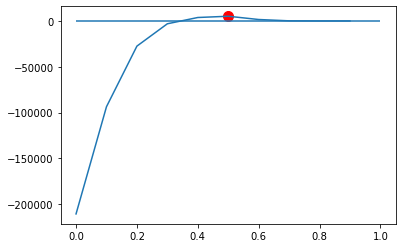

Maximum benefit at cutoff 0.5 with revenue delta of $5,313.81


In [53]:
# Generate a list of possible cutoffs and the corresponding overall revenue deltas
rev_deltas = pd.Series({cutoff: get_rev_delta(test_df, cutoff=cutoff) for cutoff in np.arange(0, 1, 0.1)})
# finding the highest revenue and its corresponding cut-off probability
def plot_tradeoff(rev_deltas: pd.Series):
    # Plot the revenue deltas
    rev_deltas.plot()
    # Mark optimal point
    max_pred = rev_deltas.idxmax()
    plt.scatter(max_pred, rev_deltas.loc[max_pred], s=100, c='red')
    # Reference line for break-even
    plt.hlines(0, 0, 1)
    plt.show()
    print(f'Maximum benefit at cutoff {max_pred} with revenue delta of ${rev_deltas.loc[max_pred]:,.2f}')

plot_tradeoff(rev_deltas)

From this chart, the strategy of 20% discount with 0.5 cut-off probability could be better than no discount.

## Scenario 1: Focus on high value customers

By focusing on high value customers and <b>value impact</b>, some workload on unprofitable clients could be saved. 

In [55]:
def get_rev_delta_high_value(pred: pd.DataFrame, cutoff: float=0.5, discount: float=0.2, min_rev: float=500):
    # add the minimum revenue 500 as other condition to give discount
    pred['discount_revenue'] = pred['base_revenue_after_churn']
    pred.loc[(pred['churn_probability'] >= cutoff) & (pred['base_revenue'] > min_rev),
    'discount_revenue'] = pred['base_revenue'] * (1 - discount)
    pred['revenue_delta'] = pred['discount_revenue'] - pred['base_revenue_after_churn']
    return pred['revenue_delta'].sum()

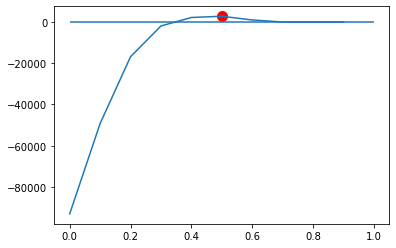

Maximum benefit at cutoff 0.5 with revenue delta of $2,783.75


In [57]:
rev_deltas_high_value = pd.Series({cutoff: get_rev_delta_high_value(test_df, cutoff=cutoff) for cutoff in np.arange(0, 1, 0.1)})

plot_tradeoff(rev_deltas_high_value)

In this scenario, it's better to give all clients with higher churn probability a discount.

## Scenario 2: Using forcast churn

Previously, `churn` was used for revenue estimate. However, this is a retrospective analysis of the effectiveness of a strategy. This example of analysis is commonly known as "backtesting", ie seeing how well a strategy would have performed historically.

In real world, any analysis is done using out-of-sample data. Conducting the analysis on the training data will lead to predictions that are too optimistic. 

In practice, actual outcomes may not be available because they are in the future. An alternative is to optimise predicted/forecast revenue based on the `churn_probability`  which are an output from our churn model. 


In [59]:
test_df['base_revenue'] = np.power(10, test_df['forecast_cons_12m']) * test_df['forecast_price_energy_off_peak'] + test_df['forecast_meter_rent_12m']

test_df['base_revenue_after_churn'] = test_df['base_revenue'] * (1 - 0.919 * test_df['churn_probability'])

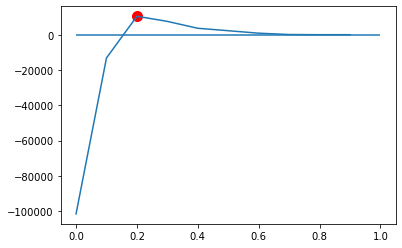

Maximum benefit at cutoff 0.2 with revenue delta of $10,626.91


In [60]:
rev_deltas = pd.Series({cutoff: get_rev_delta(test_df, cutoff=cutoff) for cutoff in np.arange(0, 1, 0.1)})
plot_tradeoff(rev_deltas)

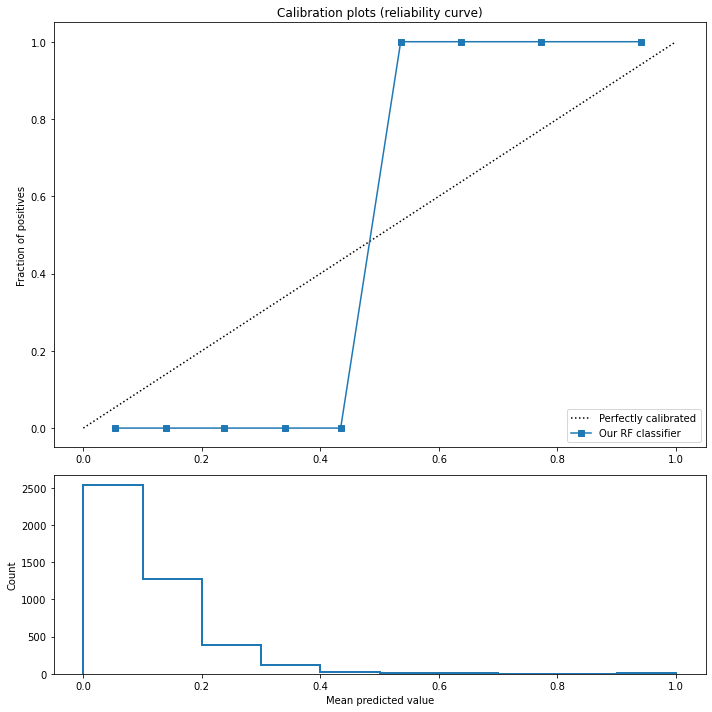

In [61]:
# Check our calibration
# (code copied from https://scikit-learn.org/stable/auto_examples/calibration/plot_calibration_curve.html)
from sklearn.calibration import calibration_curve

fig = plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))
ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
fraction_of_positives, mean_predicted_value = calibration_curve(
    y_true=test_df['churn'],
    y_prob=test_df['churn_probability'],
    n_bins=10
)
ax1.plot(mean_predicted_value, fraction_of_positives, "s-", label="Our RF classifier")
ax2.hist(test_df['churn_probability'], range=(0, 1), bins=10, histtype="step", lw=2)
ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots (reliability curve)')
ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
plt.tight_layout()

From calibration chart:


- The top calibration curve exhibits a sigmoid curve, which is typical for an under-confident classifier. (not well claibrated as the dash line.)
- The bottom chart shows us that the model is postively skewed toward predicting a probability of 0 and 0.1, perhaps due to having such low confidence. Well calibrated classifier should show peaks around 0 and 1 to distinguish two situation.

